#### https://www2.atmos.umd.edu/~cmartin/python/examples/netcdf_example1.html

In [2]:
from netCDF4 import Dataset as NetCDFFile 
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

In [3]:
nc = NetCDFFile('hgt_pres_latlon_mean_20070329_20070329_belefkY2ml.nc') # note this file is 2.5 degree, so low resolution data

In [5]:
print(nc.variables["Geopotential_height"])

<class 'netCDF4._netCDF4.Variable'>
float32 Geopotential_height(time, pressure, lat, lon)
    _FillValue: 9999.0
    units: gpm
    long_name: Geopotential_height @ pressure
    GRIB_param_discipline: Meteorological_products
    GRIB_param_category: Mass
    GRIB_param_name: Geopotential_height
    GRIB_generating_process_type: Forecast
    GRIB_param_id: [2 0 3 5]
    GRIB_product_definition_template: 0
    GRIB_product_definition_template_desc: Analysis/forecast at horizontal level/layer at a point in time
    GRIB_level_type: 100
    GRIB_level_type_name: pressure
    GRIB_VectorComponentFlag: easterlyNortherlyRelative
    ensemble: Ensemble mean
unlimited dimensions: time
current shape = (1, 1, 75, 66)
filling on


In [3]:
lat = nc.variables['lat'][:]
lon = nc.variables['lon'][:]
time = nc.variables['time'][:]
hgt = nc.variables['Geopotential_height'][:] # 2 meter temperature

In [5]:
map = Basemap(projection='merc',llcrnrlon=lon.min(),llcrnrlat=lat.min(),urcrnrlon=lon.max(),urcrnrlat=lat.max(),resolution='l') # projection, lat/lon extents and resolution of polygons to draw
# resolutions: c - crude, l - low, i - intermediate, h - high, f - full

{265.0: ([<matplotlib.lines.Line2D at 0x7fb5c44cef90>],
  [Text(7227.666828504276, -131825.51849161842, '95°W')]),
 275.0: ([<matplotlib.lines.Line2D at 0x7fb5c44bd110>],
  [Text(1113060.6915896586, -131825.51849161842, '85°W')]),
 285.0: ([<matplotlib.lines.Line2D at 0x7fb5c44b2310>],
  [Text(2226121.383179317, -131825.51849161842, '75°W')]),
 295.0: ([<matplotlib.lines.Line2D at 0x7fb5c46a14d0>],
  [Text(3339182.0747689754, -131825.51849161842, '65°W')]),
 305.0: ([<matplotlib.lines.Line2D at 0x7fb5c44bdd50>],
  [Text(4452242.766358634, -131825.51849161842, '55°W')]),
 315.0: ([<matplotlib.lines.Line2D at 0x7fb5c46a18d0>],
  [Text(5565303.457948293, -131825.51849161842, '45°W')]),
 325.0: ([<matplotlib.lines.Line2D at 0x7fb5c46b2350>],
  [Text(6678364.149537951, -131825.51849161842, '35°W')])}

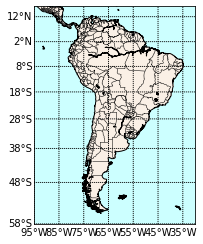

In [11]:
map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.drawlsmask(land_color='Linen', ocean_color='#CCFFFF') # can use HTML names or codes for colors
map.drawcounties() # you can even add counties (and other shapefiles!)

parallels = np.arange(lat.min(),lat.max(),10.) # make latitude lines ever 5 degrees from 30N-50N
meridians = np.arange(lon.min(),lon.max(),10.) # make longitude lines every 5 degrees from 95W to 70W
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

In [13]:
lons,lats= np.meshgrid(lon-180,lat) # for this dataset, longitude is 0 through 360, so you need to subtract 180 to properly display on map
x,y = map(lons,lats)

In [17]:
clevs = np.arange(460,540,4)
print(clevs)

[460 464 468 472 476 480 484 488 492 496 500 504 508 512 516 520 524 528
 532 536]


TypeError: Input z must be a 2D array.

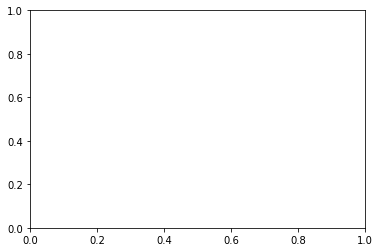

In [20]:
#clevs = np.arange(960,1040,4)
clevs = np.arange(460,540,4)

cs = map.contour(x,y,hgt[0,:,:],clevs,colors='blue',linewidths=1.)